In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
from sklearn import preprocessing
from sklearn import svm
from sklearn.cluster import KMeans

In [2]:
df= pd.read_excel(r'Data.xlsx',sheet_name='Master Apr to Mar\'13',skiprows=1)
df.drop(df.iloc[:, 19:], inplace = True, axis = 1)
df.drop(['Designation','DOJ','EmpID','Emp Name','In Active Date','Location'],inplace=True, axis=1)
df["Zone"]= df["Zone"].str.lower() 
df

,S.No,Grade,Attrition,Tenure,Gender,Education,Age,Last Rating,Monthly Income,Engagement Score (% Satisfaction),Marital Status,Zone,Remarks
0,1,E1,Yes,1. 6,Female,Bachelors,27,4,25535,0.021419,Divorced,west,Issues with the Manager
1,2,M2,Yes,1. 9,Male,MBA,36,2,52155,0.448272,Single,south,More Challenging Job Roles/ Higher designation
2,3,E1,Yes,1. 5,Male,Bachelors,24,4,26438,0.184461,Divorced,central,Issues with the Manager
3,4,M1,Yes,3 .11,Male,Bachelors,33,2,54311,0.818786,Single,west,Lack of Growth
4,5,E1,Yes,2 .1,Male,Bachelors,24,4,26702,0.493173,Divorced,north,Issues with the Manager
...,...,...,...,...,...,...,...,...,...,...,...,...,...
322,323,M1,Yes,4 .9,Male,Bachelors,37,2,53841,0.686943,Divorced,south,Lack of Growth
323,324,E1,Yes,0. 5,Male,Bachelors,25,3,25813,0.109362,Married,south,Lack of Growth
324,325,E2,Yes,7 .3,Male,Bachelors,28,1,36498,0.114816,Divorced,south,Lack of Growth
325,326,M1,Yes,8 .8,Male,Bachelors,36,3,51796,0.824147,Divorced,south,Termination - Poor Performance


In [3]:
df['Remarks'].unique()

array(['Issues with the Manager',
       'More Challenging Job Roles/ Higher designation', 'Lack of Growth',
       'Better Salary', 'Absconding', 'Termination - Theft',
       'Reasons not known', 'Higher education', 'Health Reasons',
       'Termination - Poor Performance'], dtype=object)

In [4]:
le = preprocessing.LabelEncoder()

# number=LabelEncoder
grade_map = {'E1': 0, 'E2': 1, 'M1': 2, 
               'M2': 3, 'M3': 4, 'M4': 5 ,'CXO':6}
df['Grade'] = df['Grade'].map(grade_map)

df['Gender']=le.fit_transform(df['Gender'])

education_map={'Bachelors':0 , 'MBA':1}
df['Education']=df['Education'].map(education_map)


df['Zone']=le.fit_transform(df['Zone'])

df['Marital Status']=df['Marital Status'].str.replace(" ","")
martial_status={'Single': 0,'Married':2 , 'Divorced': 1}
df['Marital Status']=df['Marital Status'].map(martial_status)

remarks={'Termination - Poor Performance':0,'Termination - Theft':1, 'Reasons not known':3,'Absconding':2,'Better Salary':9,'Higher education':7,'Health Reasons':4,'More Challenging Job Roles/ Higher designation':5,'Lack of Growth':6,'Issues with the Manager':8}
df['Remarks']=df['Remarks'].map(remarks)

df

,S.No,Grade,Attrition,Tenure,Gender,Education,Age,Last Rating,Monthly Income,Engagement Score (% Satisfaction),Marital Status,Zone,Remarks
0,1,0,Yes,1. 6,0,0,27,4,25535,0.021419,1,5,8
1,2,3,Yes,1. 9,1,1,36,2,52155,0.448272,0,4,5
2,3,0,Yes,1. 5,1,0,24,4,26438,0.184461,1,0,8
3,4,2,Yes,3 .11,1,0,33,2,54311,0.818786,0,5,6
4,5,0,Yes,2 .1,1,0,24,4,26702,0.493173,1,3,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
322,323,2,Yes,4 .9,1,0,37,2,53841,0.686943,1,4,6
323,324,0,Yes,0. 5,1,0,25,3,25813,0.109362,2,4,6
324,325,1,Yes,7 .3,1,0,28,1,36498,0.114816,1,4,6
325,326,2,Yes,8 .8,1,0,36,3,51796,0.824147,1,4,0


In [5]:
#print(type(df['Tenure'][0]))
df['Tenure']=df['Tenure'].str.replace(" ","")
#print((df['Tenure'][0]))
#a = float(df['Tenure'][0])
#print (type(a))
df['Tenure']=df['Tenure'].astype('float')

In [6]:
#Based on Grade
E1=df[df.Grade==0]
E1.drop(['Grade'],inplace=True,axis=1)

E2=df[df.Grade==1]
E2.drop(['Grade'],inplace=True,axis=1)

M1=df[df.Grade==2]
M1.drop(['Grade'],inplace=True,axis=1)

M2=df[df.Grade==3]
M2.drop(['Grade'],inplace=True,axis=1)

M3=df[df.Grade==4]
M3.drop(['Grade'],inplace=True,axis=1)

M4=df[df.Grade==5]
M4.drop(['Grade'],inplace=True,axis=1)

CX0=df[df.Grade==6]
CX0.drop(['Grade'],inplace=True,axis=1)


/home/shobhit/Documents/interiit/env/lib/python3.7/site-packages/pandas/core/frame.py:4117: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [7]:
df

,S.No,Grade,Attrition,Tenure,Gender,Education,Age,Last Rating,Monthly Income,Engagement Score (% Satisfaction),Marital Status,Zone,Remarks
0,1,0,Yes,1.60,0,0,27,4,25535,0.021419,1,5,8
1,2,3,Yes,1.90,1,1,36,2,52155,0.448272,0,4,5
2,3,0,Yes,1.50,1,0,24,4,26438,0.184461,1,0,8
3,4,2,Yes,3.11,1,0,33,2,54311,0.818786,0,5,6
4,5,0,Yes,2.10,1,0,24,4,26702,0.493173,1,3,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
322,323,2,Yes,4.90,1,0,37,2,53841,0.686943,1,4,6
323,324,0,Yes,0.50,1,0,25,3,25813,0.109362,2,4,6
324,325,1,Yes,7.30,1,0,28,1,36498,0.114816,1,4,6
325,326,2,Yes,8.80,1,0,36,3,51796,0.824147,1,4,0


In [8]:
X = []
Y = []
for i in range(0,327):
    X.append([df['Grade'][i],df['Gender'][i],df['Education'][i],df['Last Rating'][i],df['Age'][i],df['Monthly Income'][i],df['Engagement Score (% Satisfaction)'][i],df['Marital Status'][i],df['Zone'][i]])
    Y.append(df['Tenure'][i])

# Tenure Prediction Model

In [9]:
model=svm.SVR(C=100,gamma=10)
model.fit(X,Y)

SVR(C=100, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=10,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

### "model" is the regression model used to predict tenure. Attributes of the model are printed below

In [10]:
print(model.score(X, Y, sample_weight=None))
print(model.get_params())
print(model.support_vectors_)
print(model.fit_status_)
print(model.intercept_)

0.9967873608910583
{'C': 100, 'cache_size': 200, 'coef0': 0.0, 'degree': 3, 'epsilon': 0.1, 'gamma': 10, 'kernel': 'rbf', 'max_iter': -1, 'shrinking': True, 'tol': 0.001, 'verbose': False}
[[0.         0.         0.         ... 0.02141889 1.         5.        ]
 [0.         1.         0.         ... 0.18446133 1.         0.        ]
 [2.         1.         0.         ... 0.81878581 0.         5.        ]
 ...
 [1.         1.         0.         ... 0.11481639 1.         4.        ]
 [2.         1.         0.         ... 0.82414677 1.         4.        ]
 [0.         1.         0.         ... 0.48526229 1.         1.        ]]
0
[1.84081761]


In [11]:
C = []
for i in range(0,327):
    C.append([df['Last Rating'][i],10*df['Grade'][i],df['Tenure'][i]/10,df['Age'][i]/100,df['Engagement Score (% Satisfaction)'][i],df['Education'][i],df['Marital Status'][i]])
#print(C)

# Value Based Reason Model

In [12]:
reward = np.zeros(10)
kmeans = KMeans(n_clusters=10)
kmeans.fit(C)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

### "kmeans" contains the clusters of the employees. Attributes of the clusters are printed below

In [13]:
print(kmeans.cluster_centers_)
print(kmeans.labels_)
print(kmeans.inertia_)
print(kmeans.n_iter_)

[[ 2.34883721e+00 -7.99360578e-15  1.57697674e-01  2.57674419e-01
   5.04806859e-01 -6.24500451e-17  2.00000000e+00]
 [ 3.25925926e+00  3.00000000e+01  1.14074074e-01  3.93333333e-01
   5.64378273e-01  4.81481481e-01  7.40740741e-01]
 [ 3.17647059e+00  1.00000000e+01  3.78294118e-01  3.04411765e-01
   4.58616955e-01 -4.85722573e-17  1.02941176e+00]
 [ 2.86363636e+00  2.00000000e+01  2.99181818e-01  3.44545455e-01
   5.68623541e-01 -6.93889390e-18  8.63636364e-01]
 [ 3.80000000e+00  4.00000000e+01  2.76200000e-01  3.66000000e-01
   5.11572033e-01  4.00000000e-01  1.20000000e+00]
 [ 3.00000000e+00  6.00000000e+01  1.90000000e-01  5.40000000e-01
   4.50692171e-01  1.00000000e+00  2.00000000e+00]
 [ 4.31395349e+00 -1.06581410e-14  1.41465116e-01  2.62093023e-01
   5.13262852e-01 -8.32667268e-17  1.33720930e+00]
 [ 3.00000000e+00  5.00000000e+01  3.30000000e-01  4.23333333e-01
   7.19252319e-01  6.66666667e-01  1.33333333e+00]
 [ 1.88636364e+00 -7.99360578e-15  1.58522727e-01  2.59772727e-0

### Assigning the value points to each other according to the heuristics decided

In [14]:
clusters = kmeans.cluster_centers_

reward = np.zeros(10)
for i in range(len(clusters)):
    if(clusters[i][1] > 55):
        reward[i] = 9
    elif(clusters[i][1] > 45):
        reward[i] = 8
    elif(clusters[i][1] > 35):
        reward[i] = 7
    elif(clusters[i][1] > 25):
        reward[i] = 6
    elif(clusters[i][1] > 15):
        reward[i] = 5
    elif(clusters[i][1] > 5):
        reward[i] = 4
    elif(clusters[i][1] <= 5):
        if(clusters[i][0] > 3 and clusters[i][6] >= 1):
            reward[i] = 3
        elif(clusters[i][0] > 3):
            reward[i] = 2
        elif(clusters[i][6] >= 1):
            reward[i] = 1
        else:
            reward[i] = 0
print(reward)

[1. 6. 4. 5. 7. 9. 3. 8. 0. 2.]


### Assigning reasons of the employees in a cluster to the value

In [15]:
cluster = []
reasons = [[],[],[],[],[],[],[],[],[],[]]
for i in range(327):
    p = kmeans.predict([[df['Last Rating'][i],10*df['Grade'][i],df['Tenure'][i]/10,df['Age'][i]/100,df['Engagement Score (% Satisfaction)'][i],df['Education'][i],df['Marital Status'][i]]])
    reasons[int(reward[p[0]])].append(df['Remarks'][i])
print(reasons)

[[6, 8, 8, 6, 6, 6, 8, 8, 8, 8, 8, 8, 8, 6, 8, 6, 8, 8, 8, 8, 3, 6, 8, 8, 8, 6, 6, 9, 2, 8, 4, 8, 8, 8, 8, 6, 1, 0, 8, 9, 0, 0, 8, 0], [8, 6, 8, 2, 8, 8, 8, 6, 6, 6, 6, 8, 8, 6, 8, 8, 8, 8, 8, 8, 8, 1, 3, 6, 8, 8, 8, 8, 9, 8, 8, 8, 6, 6, 1, 7, 6, 5, 8, 0, 9, 2, 6], [9, 8, 6, 6, 8, 8, 6, 8, 8, 6, 8, 6, 8, 6, 6, 8, 9, 6, 8, 8, 8, 8, 8, 6, 6, 8, 8, 2, 8, 8, 8, 8, 6, 8, 1, 8, 8, 9, 8, 6, 6, 6, 6, 8, 6, 8, 8, 8, 8, 5, 8, 6, 8, 8, 8, 9, 8, 0, 0, 0, 6, 0], [8, 8, 8, 8, 8, 8, 6, 6, 6, 8, 8, 5, 6, 6, 6, 6, 6, 6, 8, 8, 8, 8, 8, 8, 8, 6, 8, 6, 8, 6, 8, 6, 2, 6, 8, 8, 8, 6, 8, 6, 2, 9, 8, 7, 7, 6, 6, 2, 8, 8, 8, 6, 8, 8, 8, 8, 8, 8, 8, 9, 6, 6, 8, 8, 8, 1, 8, 8, 8, 0, 9, 9, 8, 8, 4, 8, 0, 8, 9, 8, 8, 2, 8, 8, 6, 8], [6, 6, 6, 6, 8, 8, 6, 6, 8, 8, 6, 6, 8, 8, 8, 6, 6, 6, 6, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 6, 9, 4, 6, 6], [6, 6, 6, 6, 5, 6, 5, 6, 6, 6, 5, 5, 8, 5, 5, 9, 5, 8, 6, 6, 6, 0], [5, 9, 5, 5, 6, 5, 6, 5, 6, 5, 5, 5, 6, 5, 6, 9, 9, 6, 6, 6, 5, 4, 5, 5, 6, 0, 5], [5, 5, 1, 5, 5], [5, 5, 5], [5]

In [16]:
ar = np.zeros((10,10))
for i in range(10):
    for j in range(10):
        ar[i][j] = reasons[i].count(j)
print(ar)

[[ 4.  1.  1.  1.  1.  0. 10.  0. 24.  2.]
 [ 1.  2.  2.  1.  0.  1. 11.  1. 22.  2.]
 [ 4.  1.  1.  0.  0.  1. 18.  0. 33.  4.]
 [ 2.  1.  4.  0.  1.  1. 22.  2. 48.  5.]
 [ 0.  0.  0.  0.  1.  0. 15.  0. 16.  2.]
 [ 1.  0.  0.  0.  0.  7. 11.  0.  2.  1.]
 [ 1.  0.  0.  0.  1. 13.  9.  0.  0.  3.]
 [ 0.  1.  0.  0.  0.  4.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  3.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]]


### Plotting the reasons of leaving with the value of employees

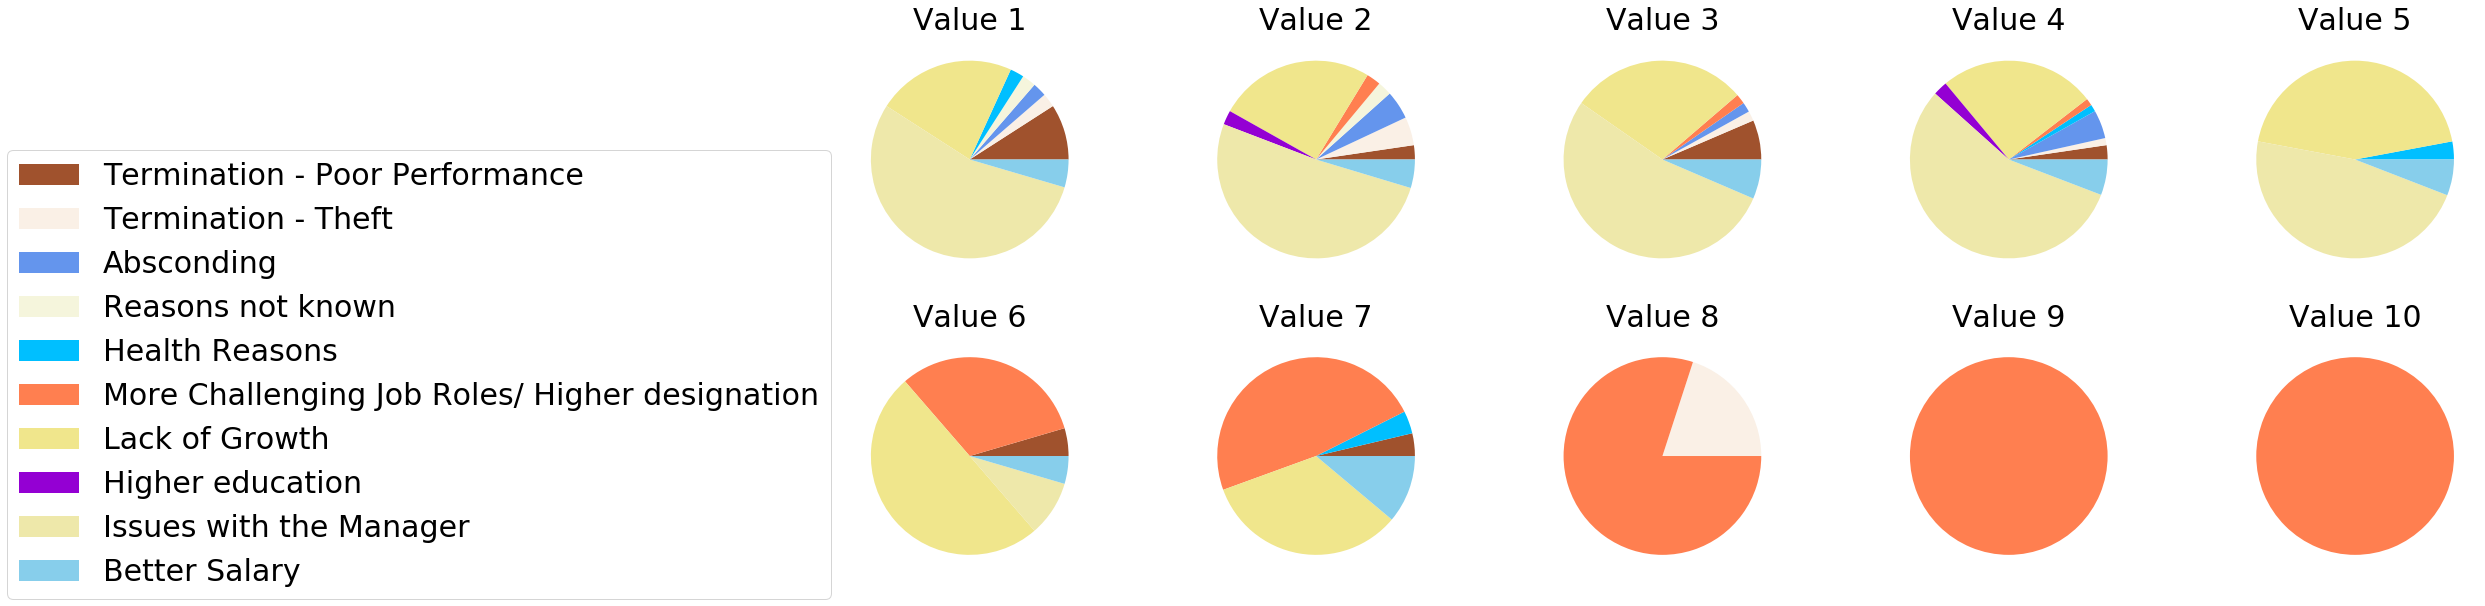

In [17]:
labels=['Termination - Poor Performance','Termination - Theft','Absconding','Reasons not known','Health Reasons','More Challenging Job Roles/ Higher designation','Lack of Growth','Higher education','Issues with the Manager','Better Salary']
clusters=pd.DataFrame(ar[0],labels,)
clusters.insert(1, "Cluster 2", ar[1], True)
clusters.insert(2, "Cluster 3", ar[2], True)
clusters.insert(3, "Cluster 4", ar[3], True)
clusters.insert(4, "Cluster 5", ar[4], True)
clusters.insert(5, "Cluster 6", ar[5], True)
clusters.insert(6, "Cluster 7", ar[6], True)
clusters.insert(7, "Cluster 8", ar[7], True)
clusters.insert(8, "Cluster 9", ar[8], True)
clusters.insert(9, "Cluster 10",ar[9], True) 

fig, axs = plt.subplots(2,5,figsize=(30,10))
from matplotlib import cm
import random
import matplotlib.colors as mcolors
cs=random.choices(list(mcolors.CSS4_COLORS.values()),k = 10)

axs[0,0].pie(clusters[0],colors=cs)
axs[0,0].set_title("Value 1",fontsize=30)
axs[0,1].pie(clusters['Cluster 2'],colors=cs)
axs[0,1].set_title("Value 2",fontsize=30)
axs[0,2].pie(clusters['Cluster 3'],colors=cs)
axs[0,2].set_title("Value 3",fontsize=30)
axs[0,3].pie(clusters['Cluster 4'],colors=cs)
axs[0,3].set_title("Value 4",fontsize=30)
axs[0,4].pie(clusters['Cluster 5'],colors=cs)
axs[0,4].set_title("Value 5",fontsize=30)
axs[1,0].pie(clusters['Cluster 6'],colors=cs)
axs[1,0].set_title("Value 6",fontsize=30)
axs[1,1].pie(clusters['Cluster 7'],colors=cs)
axs[1,1].set_title("Value 7",fontsize=30)
axs[1,2].pie(clusters['Cluster 8'],colors=cs)
axs[1,2].set_title("Value 8",fontsize=30)
axs[1,3].pie(clusters['Cluster 9'],colors=cs)
axs[1,3].set_title("Value 9",fontsize=30)
axs[1,4].pie(clusters['Cluster 10'],colors=cs)
axs[1,4].set_title("Value 10",fontsize=30)
axs[0,0].legend(labels,bbox_to_anchor=(0, 0.6),fontsize=30)